In [1]:
import pandas as pd
import altair as alt
import numpy as np
import os
import sys

source_dir = '/Users/mdeverna/Documents/Projects/mean_field_quals/src'
sys.path.insert(0, source_dir)


from simulations import run_simulation, get_peak_day, deriv_simple

### Testing with raw population counts

In [2]:
N = 1000
num_days = 100
step_size = 1  # step size
all_steps = np.arange(0, num_days, step_size)

### Set initial values ###
S_o = np.zeros(len(all_steps))
S_m = np.zeros(len(all_steps))
I_o = np.zeros(len(all_steps))
I_m = np.zeros(len(all_steps))
R_o = np.zeros(len(all_steps))
R_m = np.zeros(len(all_steps))

# These values are taking from the example found here (https://en.wikipedia.org/wiki/Compartmental_models_in_epidemiology#The_SIR_model_2)
# See the image on the side...
B_o = .4
beta_mult = 2 # This doesn't do anything because we assume ord_frac = 1
B_m = B_o * beta_mult
k = 0.04

S_o[0] = 997 # The rest are in the ordinary group
I_o[0] = 3   # Three people infected


In [3]:
t = 0

all_steps = np.arange(0, num_days, step_size)

for t in range(0, len(all_steps) - 1):
    
    d_s_o, d_i_o, d_r_o, d_s_m, d_i_m, d_r_m = deriv_simple(
        beta_o = B_o,
        beta_m = B_m,
        sus_o = S_o[t],
        sus_m = S_m[t],
        inf_o = I_o[t],
        inf_m = I_m[t],
        k = k,
        counts=True,
        N=N
    )

    # Set the next value as the current plus it's change
    S_o[t + 1] = S_o[t] + d_s_o
    S_m[t + 1] = S_m[t] + d_s_m
    I_o[t + 1] = I_o[t] + d_i_o
    I_m[t + 1] = I_m[t] + d_i_m
    R_o[t + 1] = R_o[t] + d_r_o
    R_m[t + 1] = R_m[t] + d_r_m

In [4]:
import matplotlib.pyplot as plt

In [5]:
I_o[-1] + S_o[-1] + R_o[-1]

1000.0000000000005

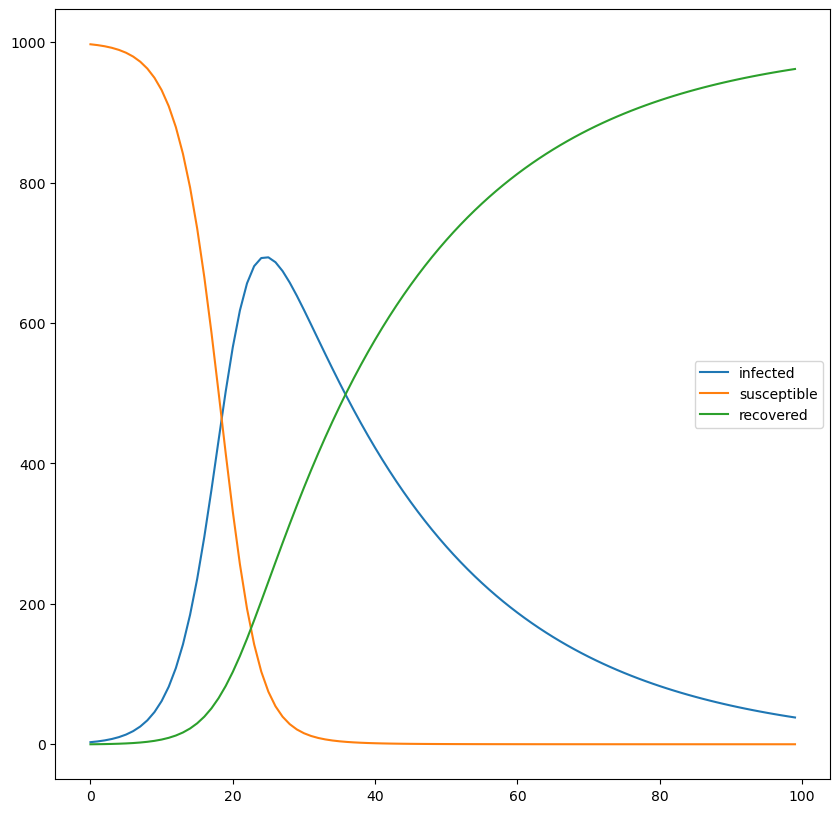

In [6]:
plt.figure(figsize=(10,10))

plt.plot(all_steps, I_o, label='infected')
plt.plot(all_steps, S_o, label='susceptible')
plt.plot(all_steps, R_o, label='recovered')

plt.legend()

# Varying $\beta$ with ordinary proportion $= x = 1$.

In [7]:
beta_values = np.arange(.02, 1.02, .02)

In [8]:
beta_values

array([0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14, 0.16, 0.18, 0.2 , 0.22,
       0.24, 0.26, 0.28, 0.3 , 0.32, 0.34, 0.36, 0.38, 0.4 , 0.42, 0.44,
       0.46, 0.48, 0.5 , 0.52, 0.54, 0.56, 0.58, 0.6 , 0.62, 0.64, 0.66,
       0.68, 0.7 , 0.72, 0.74, 0.76, 0.78, 0.8 , 0.82, 0.84, 0.86, 0.88,
       0.9 , 0.92, 0.94, 0.96, 0.98, 1.  ])

In [9]:
# Fraction of ordinary people
x = 1

# All beta values
beta_values = np.arange(.02, 1.02, .02)

# Less beta values highlighted for one of the later plots
less_betas = [0.2, 0.4, 0.6, 0.8, 1. ]

totals = []      # Total infections
r0s_ = []        # R0 valuyes
peak_days = []   # Date of each peak

# Will store the progression of infections over time, indexed by beta values
infection_flows = dict()


for beta in beta_values:
    
    # Run the simulation based on the input 
    S_o, S_m, I_o, I_m, R_o, R_m, r0s = run_simulation(
        frac_ord=x,
        prop_infec=.001,
        num_days=100,
        beta_ord=beta,
        recovery_days=5,
        beta_mult=2,     # Multiple the current beta value by this to get the misinfo group beta
        w_homophily=False,
        alpha=None
    )
    total_ord_inf = max(R_o)
    
    if np.round(beta,2) in less_betas:

        infection_flows[np.round(beta,2)] = I_o
    
    r0s_.append( (r0s[0], beta) )
    
    totals.append((beta, total_ord_inf))

In [10]:
total_frame = pd.DataFrame(totals, columns = ['beta','total_infected'])

In [11]:
total_frame

,beta,total_infected
0,0.02,0.001111
1,0.04,0.001250
2,0.06,0.001428
3,0.08,0.001665
4,0.10,0.001997
5,0.12,0.002493
6,0.14,0.003310
7,0.16,0.004861
8,0.18,0.008428
9,0.20,0.018468


In [12]:
alt.Chart(total_frame).mark_point().encode(
    x = 'beta:Q',
    y = 'total_infected:Q'
)

alt.Chart(...)

In [13]:
r0frames = pd.DataFrame(r0s_, columns=['r0', 'beta'])

In [14]:
r0frames

,r0,beta
0,0.1,0.02
1,0.2,0.04
2,0.3,0.06
3,0.4,0.08
4,0.5,0.10
5,0.6,0.12
6,0.7,0.14
7,0.8,0.16
8,0.9,0.18
9,1.0,0.20


In [15]:
beta_val = np.round(r0frames[r0frames['r0'] > 1]['beta'].min(), 2)

rule_text_df = pd.DataFrame({
    'x' : [r0frames[r0frames['r0'] > 1]['beta'].min()],
    'y1' : [0],
    'y2' : [3],
    'text' : [f"R₀ > 1 (beta = {beta_val})"]
})

r0fig1 = alt.Chart(r0frames).mark_point(color='black', size=30).encode(
    x = alt.X(
        'beta:Q',
        axis = alt.Axis(
            title = None,
            labels = False,
            labelExpr="(datum.value*100) % 10 ? null : datum.label"
        )
    ),
    y = alt.Y(
        "r0:Q",
        title = "R₀", axis=alt.Axis(orient='right')
    )
) + alt.Chart(rule_text_df).mark_rule(color = 'red').encode(
    x = 'x:Q',
    y = 'y1:Q',
    y2 = 'y2:Q'
) + alt.Chart(rule_text_df).mark_text(
    dx=10,
    dy=-10,
    fontSize=13
).encode(
    x = 'x:Q',
    y = 'y2:Q',
    text = 'text'
).properties(height=150, width=250)


rule_text_df = pd.DataFrame({
    'x' : [r0frames[r0frames['r0'] > 1]['beta'].min()],
    'y1' : [0],
    'y2' : [1],
    'text' : [f"R₀ > 1 (beta = {beta_val})"]
})

tots_fig = alt.Chart(total_frame).mark_point(color='black', size=30).encode(
    x = alt.X(
        "beta:Q",
        title = "𝛽",
        axis = alt.Axis(
            title=['beta','(no misinformed population)'],
            labelExpr="(datum.value*100) % 10 ? null : datum.label"
        )
    ),
    y = alt.Y("total_infected:Q", title=['proportion of','population infected'], axis=alt.Axis(orient='right'))
) + alt.Chart(rule_text_df).mark_rule(color = 'red').encode(
    x = 'x:Q',
    y = 'y1:Q',
    y2 = 'y2:Q'
).properties(height=150, width=250)



combined_fig = alt.vconcat(r0fig1, tots_fig, spacing=5)

combined_fig

# .configure_axis(
#     titleFontSize=15,
#     labelFontSize=14,
#     labelAngle=0
# ).configure_legend(
#     titleFontSize=15,
#     labelFontSize=14,
# )

alt.VConcatChart(...)

In [16]:
infection_flows.keys()

dict_keys([0.2, 0.4, 0.6, 0.8, 1.0])

In [17]:
infections = pd.DataFrame(infection_flows).reset_index()
infections = infections.rename(columns={'index':'day'})
infections.day = infections.day +1
infections.melt(id_vars='day')

,day,variable,value
0,1,0.2,1.000000e-03
1,2,0.2,9.998000e-04
2,3,0.2,9.995601e-04
3,4,0.2,9.992803e-04
4,5,0.2,9.989607e-04
...,...,...,...
495,96,1.0,1.064079e-08
496,97,1.0,8.534438e-09
497,98,1.0,6.845038e-09
498,99,1.0,5.490057e-09


In [18]:
info = []

for beta, infects in infection_flows.items():
    peak_x = get_peak_day(infects)
    peak_y = max(infects)
    text = f"{np.round(peak_y,2)} (beta = {beta})"
    info.append( (peak_x, peak_y, text) )

In [19]:
text_dfs = pd.DataFrame(info, columns = ['peak_x', 'peak_y', 'text'])
text_dfs

,peak_x,peak_y,text
0,0,0.001000,0.0 (beta = 0.2)
1,36,0.161499,0.16 (beta = 0.4)
2,22,0.324923,0.32 (beta = 0.6)
3,16,0.447510,0.45 (beta = 0.8)
4,13,0.541865,0.54 (beta = 1.0)


In [20]:
text_dfs = text_dfs[text_dfs['peak_x']>0]


In [21]:
lines = alt.Chart(infections.melt(id_vars='day')).mark_line(size=2, color = 'black').encode(
    x = alt.X(
        'day:Q',
        title = ["Time", "(days)"]
    ),
    y = alt.Y(
        'value:Q',
        title = ["proportion of population infected", "(no misinformed group)"],
        scale = alt.Scale(domain=(0,1))
    ),
    strokeDash = alt.StrokeDash(
        'variable:N',
        title = "𝛽",
        legend=None
    )
).properties(height=320, width=500)

texts = alt.Chart(text_dfs).mark_text(dy=-7,dx=0,fontSize=14,align='left').encode(
    x = 'peak_x:Q',
    y = 'peak_y:Q',
    text = 'text'
)

lines = alt.layer(lines,texts)


alt.hconcat(
    lines,
    combined_fig,
).configure_axis(
    titleFontSize=15,
    labelFontSize=14,
    labelAngle=0
)
# .configure_legend(
#     titleFontSize=15,
#     labelFontSize=14,
#     orient='top',
#     offset=0
# )

alt.HConcatChart(...)

# How infections change based on recovery rate

In [22]:
# Fraction of ordinary people
x = 1

# All beta values
beta_values = np.arange(.1, 1.1, .1)

totals = []      # Total infections
r0s_ = []        # R0 valuyes
peak_days = []   # Date of each peak

# Will store the progression of infections over time, indexed by beta values
infection_flows = dict()

recovery_days = np.arange(1,21,1)

# We fix beta at .3 based on the above
beta= .3

for rec_days in recovery_days:

    # Run the simulation based on the input 
    S_o, S_m, I_o, I_m, R_o, R_m, r0s = run_simulation(
        frac_ord=x,
        prop_infec=.001,
        num_days=100,
        beta_ord=beta,
        recovery_days=rec_days,
        beta_mult=2,     # Multiple the current beta value by this to get the misinfo group beta
        w_homophily=False,
        alpha=None
    )
    total_ord_inf = max(R_o)

    infection_flows[(rec_days)] = I_o

    r0s_.append( (r0s[0], rec_days) )

    totals.append((rec_days, total_ord_inf))

In [23]:
r0frames = pd.DataFrame(r0s_, columns=['r0', 'rec_days'])

In [24]:
infections = pd.DataFrame(infection_flows).reset_index()
infections = infections.rename(columns={'index':'day'})
infections.day = infections.day +1
infections.melt(id_vars='day')

,day,variable,value
0,1,1,0.001000
1,2,1,0.000300
2,3,1,0.000090
3,4,1,0.000027
4,5,1,0.000008
...,...,...,...
1995,96,20,0.040704
1996,97,20,0.038697
1997,98,20,0.036788
1998,99,20,0.034974


In [25]:
lines = alt.Chart(infections.melt(id_vars='day')).transform_filter(
    "datum.variable % 4 == 0"
).mark_line(size=2, color='black').encode(
    x = alt.X(
        'day:Q',
        title = ["time", "(days)"]
    ),
    y = alt.Y(
        'value:Q',
        title = ["proportion of population infected", "(no misinformed group)"],
#         scale = alt.Scale(domain=(0,1))
    ),
    strokeDash = alt.StrokeDash(
        'variable:N',
        title = "days to recover",
#         legend=None
    ) 
#     shape = alt.Shape(
#         'variable:N'
#     ),
#     color = alt.Color(
#         'variable:N',
#         legend = alt.Legend(title='days to recover')
#     )
).properties(width=500, height=320)
# .configure_axis(
#     titleFontSize=15,
#     labelFontSize=14,
#     labelAngle=0
# ).configure_legend(
#     titleFontSize=15,
#     labelFontSize=14,
# )

# texts = alt.Chart(text_dfs).mark_text(dy=-7,dx=10,fontSize=14).encode(
#     x = 'peak_x:Q',
#     y = 'peak_y:Q',
#     text = 'text'
# )

# alt.layer(lines,texts).configure_axis(
#     titleFontSize=15,
#     labelFontSize=14,
#     labelAngle=0
# ).configure_legend(
#     titleFontSize=15,
#     labelFontSize=14,
# )

lines

alt.Chart(...)

In [26]:
peak_days = []

for recovery_period, infections in infection_flows.items():
    
    peak_days.append( (recovery_period, get_peak_day(infections)) )

peaks_df = pd.DataFrame(peak_days, columns = ['recovery', 'peak_day'])
peaks_df

,recovery,peak_day
0,1,0
1,2,0
2,3,0
3,4,83
4,5,59
5,6,51
6,7,46
7,8,44
8,9,42
9,10,41


In [27]:
min_rec = r0frames[r0frames['r0'] > 1]['rec_days'].min()

rule_text_df = pd.DataFrame({
    'x' : [r0frames[r0frames['r0'] > 1]['rec_days'].min()],
    'y1' : [0],
    'y2' : [3.5],
    'text' : [f"R₀ > 1 ({min_rec} days)"]
})

rnaught_fig = alt.Chart(r0frames).mark_point(color='black').encode(
    x = alt.X(
        "rec_days:Q",
        axis = alt.Axis(
            title=None,
            labels=False
        )
    ),
    y = alt.Y("r0:Q", title = "R₀", axis=alt.Axis(orient='right')),
) + alt.Chart(rule_text_df).mark_text(
    dx=0,
    dy=-10,
    fontSize=13
).encode(
    x = 'x:Q',
    y = 'y2:Q',
    text = 'text'
) + alt.Chart(rule_text_df).mark_rule(color = 'red').encode(
    x = 'x:Q',
    y = 'y1:Q',
    y2 = 'y2:Q'
).properties(height=150, width=250)
    


rule_text_df = pd.DataFrame({
    'x' : [r0frames[r0frames['r0'] > 1]['rec_days'].min()],
    'y1' : [0],
    'y2' : [90],
    'text' : [f"R0 > 1 ({min_rec} days)"]
})

peaks_fig = alt.Chart(peaks_df).mark_point(color='black').encode(
    x = alt.X("recovery:Q", title =['days to recover']),
    y = alt.Y("peak_day:Q", title = "peak infection day", axis=alt.Axis(orient='right')),
) + alt.Chart(rule_text_df).mark_rule(color = 'red').encode(
    x = 'x:Q',
    y = 'y1:Q',
    y2 = 'y2:Q'
).properties(height=150, width=250)



alt.hconcat(
    lines, 
    alt.vconcat(rnaught_fig,peaks_fig, spacing=5),
).configure_axis(
    titleFontSize=15,
    labelFontSize=14,
    labelAngle=0
).configure_legend(
    titleFontSize=15,
    labelFontSize=14,
    orient='top',
    offset=0
)

alt.HConcatChart(...)

### In the above, we fix beta at 0.3

In [28]:
r0frames

,r0,rec_days
0,0.3,1
1,0.6,2
2,0.9,3
3,1.2,4
4,1.5,5
5,1.8,6
6,2.1,7
7,2.4,8
8,2.7,9
9,3.0,10


### Varying $\beta$ with half misinformed and half ordinary. Again, we fix beta at 0.3. This time we vary the multiplier effect

In [29]:
IO = .5
IM = .5

In [30]:
alpha = .5

In [31]:
(IO * alpha) + (IM * (1- alpha))

0.5

In [32]:
IO_ = (IO * alpha) + (IM * (1- alpha))
IM_ = (IO * alpha) + (IM * (1- alpha))

IO_ + IM_

1.0

In [33]:
IO_ + IM_

1.0

In [34]:
# Fraction of ordinary people
x = .5

# All beta values
beta_values = np.arange(.1, 1.1, .1)

totals = []      # Total infections
r0s_ = []        # R0 valuyes
peak_days = []   # Date of each peak

# Will store the progression of infections over time, indexed by beta values
infection_flows_ord = dict()
infection_flows_mis = dict()

recovery_days = np.arange(1,21,1)

# We fix beta at .3 and recovery at 7 days based on the above
beta = .3
rec_days = 7

# multipliers = [1.2, 1.4, 1.6, 1.8, 2, 4, 6]
multipliers = np.arange(1,4.2,.2)

for multiplier in multipliers:

    # Run the simulation based on the input 
    S_o, S_m, I_o, I_m, R_o, R_m, r0s = run_simulation(
        frac_ord=x,
        prop_infec=.001,
        num_days=100,
        beta_ord=beta,
        recovery_days=rec_days,
        beta_mult=multiplier,
        w_homophily=False,
        alpha=None
    )
    total_ord_inf = max(R_o)
    total_mis_inf = max(R_m)

    infection_flows_ord[np.round(multiplier,1)] = I_o
    infection_flows_mis[np.round(multiplier,1)] = I_m
    
    # ord_r0, mis_r0, weighted_avg_r0
    r0s_.append( (r0s[0], r0s[1], r0s[2], multiplier) )

    totals.append((total_ord_inf, total_mis_inf, multiplier))

In [35]:
r0frames = pd.DataFrame(r0s_, columns = ['ordinary', 'misinfo', 'weighted_avg', 'multiplier'])

r0frames

,ordinary,misinfo,weighted_avg,multiplier
0,2.1,2.10,2.10,1.0
1,2.1,2.52,2.31,1.2
2,2.1,2.94,2.52,1.4
3,2.1,3.36,2.73,1.6
4,2.1,3.78,2.94,1.8
5,2.1,4.20,3.15,2.0
6,2.1,4.62,3.36,2.2
7,2.1,5.04,3.57,2.4
8,2.1,5.46,3.78,2.6
9,2.1,5.88,3.99,2.8


In [36]:
both_totals = pd.DataFrame(totals, columns = ['total_ord_inf', 'total_mis_inf', 'multiplier'])
both_totals['diff'] = both_totals['total_mis_inf'] - both_totals['total_ord_inf']
both_totals['total_inf'] = both_totals['total_ord_inf'] + both_totals['total_mis_inf'] 

both_totals

,total_ord_inf,total_mis_inf,multiplier,diff,total_inf
0,0.413049,0.413223,1.0,0.000174,0.826272
1,0.421837,0.446702,1.2,0.024865,0.868539
2,0.426648,0.466947,1.4,0.040298,0.893595
3,0.429522,0.479434,1.6,0.049912,0.908957
4,0.431337,0.487216,1.8,0.055879,0.918553
5,0.432530,0.492085,2.0,0.059555,0.924615
6,0.433340,0.495132,2.2,0.061792,0.928471
7,0.433907,0.497031,2.4,0.063124,0.930938
8,0.434316,0.498209,2.6,0.063893,0.932525
9,0.434621,0.498932,2.8,0.064311,0.933553


In [37]:
combined_infections = pd.DataFrame(infection_flows_ord) + pd.DataFrame(infection_flows_mis)
combined_infections = combined_infections.reset_index()
combined_infections = combined_infections.rename(columns={'index':'day'})
combined_infections.day = combined_infections.day + 1
combined_infections = combined_infections.melt(id_vars='day')
combined_infections.rename(columns={"variable":"multiplier"},inplace=True)
combined_infections

,day,multiplier,value
0,1,1.0,0.001000
1,2,1.0,0.001157
2,3,1.0,0.001338
3,4,1.0,0.001548
4,5,1.0,0.001790
...,...,...,...
1595,96,4.0,0.000023
1596,97,4.0,0.000020
1597,98,4.0,0.000018
1598,99,4.0,0.000016


In [38]:
infections_ord = pd.DataFrame(infection_flows_ord).reset_index()
infections_ord = infections_ord.rename(columns={'index':'day'})
infections_ord.day = infections_ord.day + 1
infections_ord = infections_ord.melt(id_vars='day')
infections_ord

,day,variable,value
0,1,1.0,0.000000
1,2,1.0,0.000150
2,3,1.0,0.000302
3,4,1.0,0.000459
4,5,1.0,0.000626
...,...,...,...
1595,96,4.0,0.000021
1596,97,4.0,0.000019
1597,98,4.0,0.000017
1598,99,4.0,0.000015


In [39]:
infections_mis = pd.DataFrame(infection_flows_mis).reset_index()
infections_mis = infections_mis.rename(columns={'index':'day'})
infections_mis.day = infections_mis.day + 1
infections_mis = infections_mis.melt(id_vars='day')

In [40]:
infections_mis.rename(columns={"variable":"multiplier"},inplace=True)
infections_ord.rename(columns={"variable":"multiplier"},inplace=True)

infections_mis['group'] = 'misinformed'
infections_ord['group'] = 'ordinary'

In [41]:
both_infections = pd.concat((infections_mis,infections_ord))

In [42]:
both_infections

,day,multiplier,value,group
0,1,1.0,0.001000,misinformed
1,2,1.0,0.001007,misinformed
2,3,1.0,0.001036,misinformed
3,4,1.0,0.001088,misinformed
4,5,1.0,0.001164,misinformed
...,...,...,...,...
1595,96,4.0,0.000021,ordinary
1596,97,4.0,0.000019,ordinary
1597,98,4.0,0.000017,ordinary
1598,99,4.0,0.000015,ordinary


In [43]:
alt.data_transformers.disable_max_rows()

DataTransformerRegistry.enable('default')

In [44]:
combined_infections[combined_infections['multiplier'] == 2]['value'].max() \
/ combined_infections[combined_infections['multiplier'] == 1]['value'].max()

1.7603264527313098

In [45]:
combined_infections['multiplier'].unique()

array([1.0, 1.2, 1.4, 1.6, 1.8, 2.0, 2.2, 2.4, 2.6, 2.8, 3.0, 3.2, 3.4,
       3.6, 3.8, 4.0], dtype=object)

In [46]:
combined_infections

,day,multiplier,value
0,1,1.0,0.001000
1,2,1.0,0.001157
2,3,1.0,0.001338
3,4,1.0,0.001548
4,5,1.0,0.001790
...,...,...,...
1595,96,4.0,0.000023
1596,97,4.0,0.000020
1597,98,4.0,0.000018
1598,99,4.0,0.000016


In [47]:
print(get_peak_day(infection_flows_ord[4]))
print(get_peak_day(infection_flows_mis[4]))

19
16


### Not used currently...

In [48]:
no_diff_peak_day = get_peak_day(infection_flows_ord[1])
max_diff_peak_day = get_peak_day(infection_flows_mis[4])
no_diff_y = max(infection_flows_ord[1]) + max(infection_flows_mis[1] + .02)
max_diff_y = max(infection_flows_ord[4]) + max(infection_flows_mis[4])

comb_text_df = pd.DataFrame({
    'x' : [no_diff_peak_day, max_diff_peak_day],
    'y' : [no_diff_y, max_diff_y],
    'text' : ["no subpopulation difference", "large subpopulation difference"]
})

### Calculate the total extra proportion of the population infected

In [49]:
both_totals['total_extra'] = (both_totals['total_inf'] - both_totals['total_inf'].min()) #/ both_totals['total_inf'].min()

In [50]:
both_totals

,total_ord_inf,total_mis_inf,multiplier,diff,total_inf,total_extra
0,0.413049,0.413223,1.0,0.000174,0.826272,0.000000
1,0.421837,0.446702,1.2,0.024865,0.868539,0.042267
2,0.426648,0.466947,1.4,0.040298,0.893595,0.067323
3,0.429522,0.479434,1.6,0.049912,0.908957,0.082684
4,0.431337,0.487216,1.8,0.055879,0.918553,0.092281
5,0.432530,0.492085,2.0,0.059555,0.924615,0.098343
6,0.433340,0.495132,2.2,0.061792,0.928471,0.102199
7,0.433907,0.497031,2.4,0.063124,0.930938,0.104666
8,0.434316,0.498209,2.6,0.063893,0.932525,0.106252
9,0.434621,0.498932,2.8,0.064311,0.933553,0.107281


In [51]:
infections_mis

,day,multiplier,value,group
0,1,1.0,1.000000e-03,misinformed
1,2,1.0,1.006843e-03,misinformed
2,3,1.0,1.036136e-03,misinformed
3,4,1.0,1.088312e-03,misinformed
4,5,1.0,1.164303e-03,misinformed
...,...,...,...,...
1595,96,4.0,1.792355e-06,misinformed
1596,97,4.0,1.537238e-06,misinformed
1597,98,4.0,1.318451e-06,misinformed
1598,99,4.0,1.130818e-06,misinformed


In [52]:
totals

[(0.41304925004506515, 0.41322315130932485, 1.0),
 (0.42183718237411, 0.44670199433762137, 1.2),
 (0.4266484776672601, 0.46694685113127676, 1.4),
 (0.42952244654175153, 0.47943444793049755, 1.5999999999999999),
 (0.43133728272512756, 0.4872158480967377, 1.7999999999999998),
 (0.4325299409400005, 0.4920849799597346, 1.9999999999999998),
 (0.43333986775443456, 0.49513157427931925, 2.1999999999999997),
 (0.4339068670562134, 0.4970313448806066, 2.3999999999999995),
 (0.4343160745176117, 0.4982087281483104, 2.5999999999999996),
 (0.4346208223355043, 0.49893224359501215, 2.8),
 (0.43485517053475536, 0.4993721896575954, 2.9999999999999996),
 (0.4350411698242902, 0.49963640985236235, 3.1999999999999993),
 (0.4351932473595864, 0.4997928653724576, 3.3999999999999995),
 (0.43532093342038714, 0.49988405324611307, 3.5999999999999996),
 (0.4354305900254601, 0.4999362761470837, 3.7999999999999994),
 (0.43552651997274555, 0.4999656115085161, 3.999999999999999)]

In [53]:
np.round(np.geomspace(1,6,10),2)

array([1.  , 1.22, 1.49, 1.82, 2.22, 2.71, 3.3 , 4.03, 4.92, 6.  ])

In [54]:
.3 * 4

1.2

In [55]:
both_totals['total_extra'].max()

0.10921973012687158

# For pub

In [56]:
combined_infections

,day,multiplier,value
0,1,1.0,0.001000
1,2,1.0,0.001157
2,3,1.0,0.001338
3,4,1.0,0.001548
4,5,1.0,0.001790
...,...,...,...
1595,96,4.0,0.000023
1596,97,4.0,0.000020
1597,98,4.0,0.000018
1598,99,4.0,0.000016


In [57]:
combined_infections.multiplier.unique()

array([1.0, 1.2, 1.4, 1.6, 1.8, 2.0, 2.2, 2.4, 2.6, 2.8, 3.0, 3.2, 3.4,
       3.6, 3.8, 4.0], dtype=object)

In [58]:
less_combined = combined_infections[combined_infections.multiplier.isin([1,2,3,4])].copy()
less_mis = infections_mis[infections_mis.multiplier.isin([1,2,3,4])].copy()
less_ord = infections_ord[infections_ord.multiplier.isin([1,2,3,4])].copy()

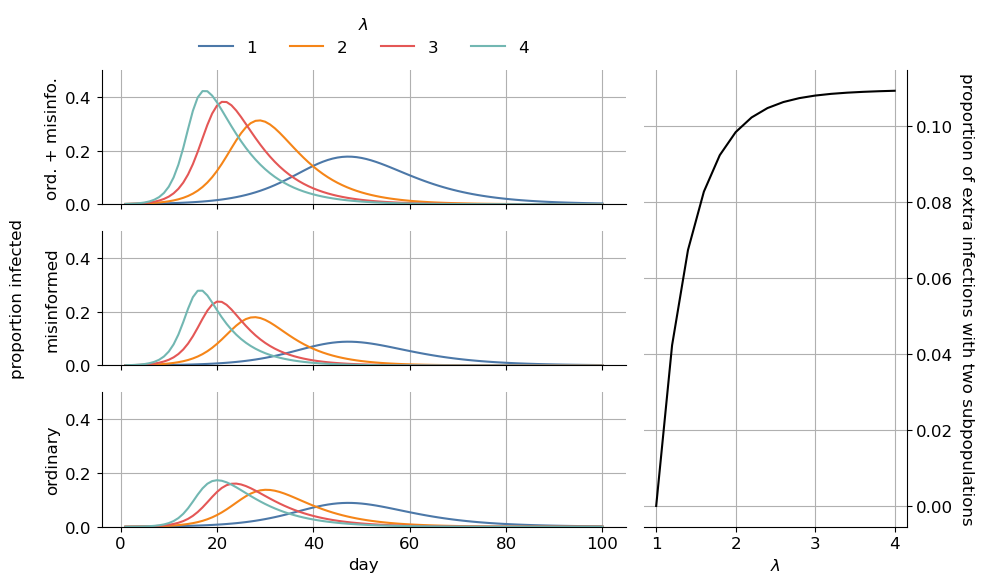

In [61]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

# Set the font size for all text
plt.rcParams.update({'font.size': 12})

# Create color map based on Tableu10 found here: https://vega.github.io/vega/docs/schemes/
color_map = {
    1:"#4c78a8",
    2:"#f58518",
    3:"#e45756",
    4:"#72b7b2"
}

# Create the figure and grid layout
fig = plt.figure(figsize=(10, 6))
grid = gridspec.GridSpec(3, 2, width_ratios=[2, 1])

# Create subplots for the first column
ax1 = plt.subplot(grid[0, 0])
ax2 = plt.subplot(grid[1, 0])
ax3 = plt.subplot(grid[2, 0])

## Combined figure
for mult in less_combined.multiplier.unique():
    temp_df = less_combined[less_combined.multiplier == mult]
    ax1.plot(
        temp_df['day'],
        temp_df['value'],
        color = color_map[mult],
        label = int(mult)
    )

## Misinformed figure
for mult in less_mis.multiplier.unique():
    temp_df = less_mis[less_mis.multiplier == mult]
    ax2.plot(
        temp_df['day'],
        temp_df['value'],
        color = color_map[mult],
        label = int(mult)
    )
    
## Ordinary figure
for mult in less_ord.multiplier.unique():
    temp_df = less_ord[less_ord.multiplier == mult]
    ax3.plot(
        temp_df['day'],
        temp_df['value'],
        color = color_map[mult],
        label = int(mult)
    )


# Set the y-axis limits for the first column
ax1.set_ylim(0, 0.5)
ax2.set_ylim(0, 0.5)
ax3.set_ylim(0, 0.5)

# Share y-axis limits for the first column
ax2.sharey(ax1)
ax3.sharey(ax1)

# Add gridlines to all subplots
ax1.grid(True)
ax2.grid(True)
ax3.grid(True)

# Remove spines
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)

ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)

ax3.spines['top'].set_visible(False)
ax3.spines['right'].set_visible(False)

# Remove x-axis ticks
ax1.xaxis.set_ticklabels([])
ax2.xaxis.set_ticklabels([])

### Create right panel

# Create subplot for the second column spanning all three rows
ax4 = plt.subplot(grid[:, 1])

# Plot extra infections
ax4.plot(
    both_totals['multiplier'],
    both_totals['total_extra'],
    color = "black",
)
# ax4.scatter(
#     both_totals['multiplier'],
#     both_totals['total_extra'],
#     marker='x',
#     color='black'
# )

# Move the y-axis of the right spanning plot to the right side
ax4.yaxis.tick_right()
ax4.yaxis.set_label_position('right')

# # Set the y-axis limits for the second column
# ax4.set_ylim(0, 1)

# Add gridlines to the subplot in the second column
ax4.grid(True)

# Remove spines
ax4.spines['left'].set_visible(False)
ax4.spines['top'].set_visible(False)

# Set labels for each subplot
ax1.set_ylabel('ord. + misinfo.')
ax2.set_ylabel('proportion infected\n\nmisinformed')
ax3.set_ylabel('ordinary')
ax3.set_xlabel('day')
ax4.set_ylabel('proportion of extra infections with two subpopulations', rotation=-90, va='bottom')
ax4.set_xlabel('$\lambda$')


# Add a legend above the top left panel
ax1.legend(
    loc='lower center',
    bbox_to_anchor=(0.5, 1),
    ncol=4,
    frameon=False,
    title = '$\lambda$',
)


# Adjust the spacing between subplots
# plt.subplots_adjust(wspace=0.3, hspace=0.3)

plt.tight_layout()

# Save the plot
plt.savefig('../figures/mf_lambda_effect.pdf', dpi = 800)
